目标检测（object detection）或目标识别（object recognition）:很多时候图像里有多个我们感兴趣的目标，我们不仅想知道它们的类别，还想得到它们在图像中的具体位置

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

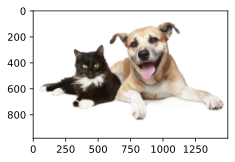

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

d2l.set_figsize()
img = d2l.plt.imread('../../data/catdog.jpg')
d2l.plt.imshow(img);

# 边界框（bounding box）
用于描述对象的空间位置，一种由矩形左上角的以及右下角的x和y坐标决定（**box_corner**），另一种常用的边界框表示方法是边界框中心的(x,y)轴坐标以及框的宽度和高度（**center**）

In [4]:
#@save
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1) # 沿着新维度对张量序列进行连接
    return boxes

#@save
def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

In [23]:
# bbox是边界框的英文缩写
dog_bbox, cat_bbox = [581.0, 86.0, 1461.0, 840.0], [36.0, 245.0, 677.0, 761.0]

In [24]:
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [25]:
#@save
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

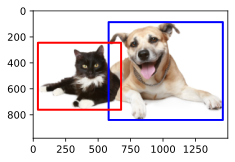

In [26]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

# 小结
* 目标检测不仅可以识别图像中所有感兴趣的物体，还能识别它们的位置，该位置通常由矩形边界框表示。

* 我们可以在两种常用的边界框表示（中间，宽度，高度）和（左上，右下）坐标之间进行转换。